## Materiały:

http://dkopczyk.quantee.co.uk/speech-nn/
https://stackoverflow.com/questions/54701792/how-to-convert-wav-files-into-a-pandas-dataframe-in-order-to-feed-it-to-a-neura
https://medium.com/@ageitgey/machine-learning-is-fun-part-6-how-to-do-speech-recognition-with-deep-learning-28293c162f7a

## Import danych

In [67]:
import os
import numpy as np
from scipy.io import wavfile

rootdir = os.path.join(os.getcwd(), "speech_commands")

all_data = {}

for subdir, dirs, files in os.walk(rootdir):
    
    folder = os.path.basename(subdir)
    print(folder)
    
    wav_data = []
    
    for file in files:
        filename, ext = os.path.splitext(file)
        folder = os.path.basename(subdir)
        
        if(ext == ".wav"):
            fs, data = wavfile.read(rootdir + "/" + folder + "/" +file)
            data = data.astype(np.float32) / np.iinfo(np.int16).max

            wav_data.append(data)
    
    if len(wav_data)>0:
        all_data[folder] = wav_data    
    print("-----------------------------")

speech_commands
-----------------------------
seven
-----------------------------
right
-----------------------------
five
-----------------------------
_background_noise_
-----------------------------
stop
-----------------------------
marvin
-----------------------------
yes


/home/kasia/anaconda3/envs/gpu_env/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


-----------------------------
left
-----------------------------
other
-----------------------------
cat
-----------------------------
up
-----------------------------
go
-----------------------------
sheila
-----------------------------
happy
-----------------------------
one
-----------------------------
bird
-----------------------------
house
-----------------------------
down
-----------------------------
dog
-----------------------------
on
-----------------------------
four
-----------------------------
zero
-----------------------------
off
-----------------------------
two
-----------------------------
no
-----------------------------
tree
-----------------------------
bed
-----------------------------
eight
-----------------------------
six
-----------------------------
wow
-----------------------------
three
-----------------------------
nine
-----------------------------


Każde słowo jest kluczem słownika, a wartością dla tego klucza jest lista nagrań danego słowa. Każde pojedyncze nagranie również jest listą

In [68]:
all_data['nine']

[array([ 0.00152593,  0.00543229,  0.00195318, ..., -0.00442518,
        -0.00408948, -0.002472  ], dtype=float32),
 array([0.00149541, 0.00286874, 0.00210578, ..., 0.0155034 , 0.01944029,
        0.01275674], dtype=float32),
 array([-0.00024415, -0.00024415,  0.00106815, ...,  0.001648  ,
         0.00137333, -0.00073244], dtype=float32),
 array([-0.0004883 , -0.00067141, -0.00073244, ..., -0.00091556,
        -0.00094607, -0.00085452], dtype=float32),
 array([0.00375378, 0.00729392, 0.00872829, ..., 0.00845363, 0.00836207,
        0.00842311], dtype=float32),
 array([-0.02005066, -0.03076266, -0.02554399, ..., -0.03500473,
        -0.03790399, -0.04034547], dtype=float32),
 array([-0.00482192, -0.00531022, -0.00479141, ...,  0.00207526,
        -0.00317392, -0.00970489], dtype=float32),
 array([ 0.        , -0.00027467, -0.00024415, ...,  0.00015259,
         0.00015259,  0.00012207], dtype=float32),
 array([-3.05185094e-05, -3.05185094e-05, -3.05185094e-05, ...,
        -1.01962343e

In [69]:
# Tyle jest słów

len(all_data)

31

In [70]:
# Takie są przykładowe liczby próbek danego słowa

print(len(all_data['wow']))
print(len(all_data['off']))
print(len(all_data['dog']))
print(len(all_data['bed']))
print(len(all_data['nine']))
print(len(all_data['four']))

1745
2357
1746
1713
2364
2372


In [83]:
# Takie są przykładowe długości wektorów pojedynczych próbek

print(len(all_data['nine'][0]))
print(len(all_data['nine'][3]))
print(len(all_data['dog'][0]))
print(len(all_data['dog'][4]))

13654
16000
16000
16000


### Wizualizacja przykładowego nagrania dla każdego ze słów:

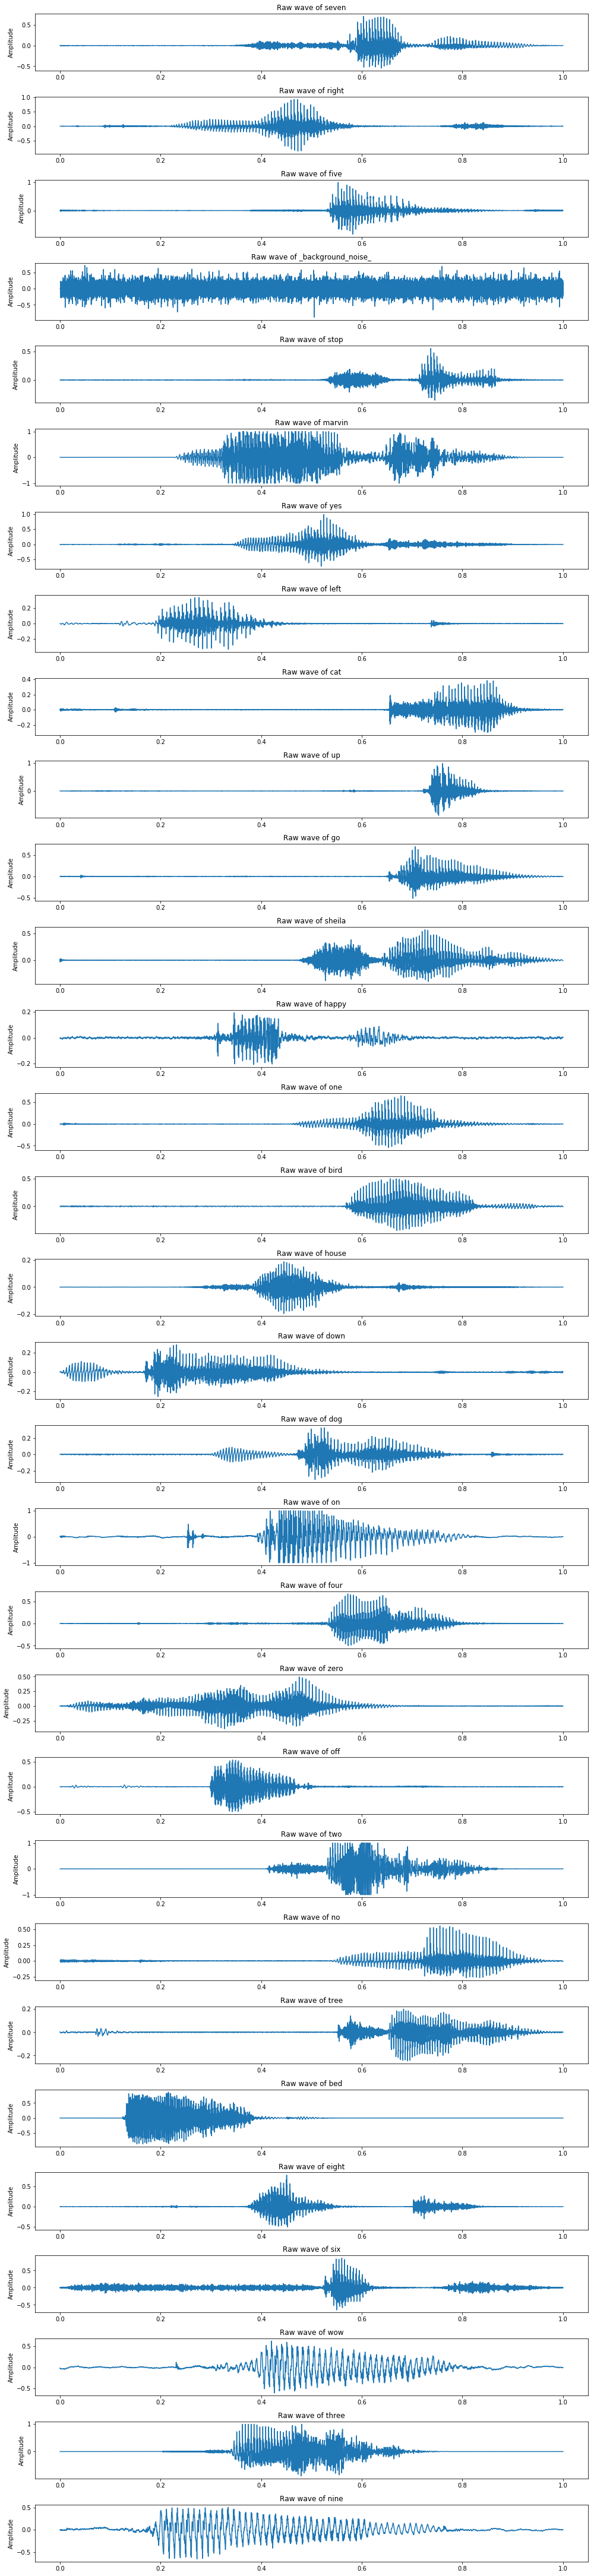

In [87]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 64))

for i, (element, wav) in enumerate(all_data.items()):
    
    single_wav = wav[0]
    
    ax = fig.add_subplot(33,1,i+1)
    ax.set_title('Raw wave of ' + element)
    ax.set_ylabel('Amplitude')
    SAMPLE_RATE = len(single_wav)
    ax.plot(np.linspace(0, SAMPLE_RATE/len(single_wav), SAMPLE_RATE), single_wav)

fig.tight_layout()